In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

In [2]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
X = scaler.fit_transform(X)

In [7]:
X.shape

(768, 8)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [9]:
model  = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 8))
model.add(Dense(1,activation ='sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.fit(X_train, y_train, epochs = 100, batch_size= 32, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4824 - loss: 0.7352 - val_accuracy: 0.5779 - val_loss: 0.6955
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5815 - loss: 0.6794 - val_accuracy: 0.6429 - val_loss: 0.6490
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6782 - loss: 0.6346 - val_accuracy: 0.6494 - val_loss: 0.6147
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.5962 - val_accuracy: 0.7013 - val_loss: 0.5851
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7389 - loss: 0.5723 - val_accuracy: 0.7403 - val_loss: 0.5616
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.5678 - val_accuracy: 0.7727 - val_loss: 0.5417
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.5325 - val_accuracy: 0.7792 - val_loss: 0.5256
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7239 - loss: 0.5461 - val_accuracy: 0.7857 - 

# 1. How to select appropriate Optimizer
# 2. Number of Neurons in a layer
# 3. How to select Number of Layer
# 4. All in all one model

In [13]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.1 MB/s eta 0:00:00


In [14]:
import kerastuner as kt

<ipython-input-14-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# 1. Finding Best Optimizer

In [15]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32, activation = 'relu', input_dim= 8))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = hp.Choice('optimizer', values = ['adam', 'sgd', 'rmsprop','adadelta'])
    model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [17]:
tuner = kt.RandomSearch(build_model, objective= 'val_accuracy', max_trials=5)

In [18]:
tuner.search(X_train, y_train, epochs = 5, validation_data= (X_test, y_test))

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.4285714328289032

Best val_accuracy So Far: 0.7727272510528564
Total elapsed time: 00h 00m 10s


In [19]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [21]:
model = tuner.get_best_models(num_models = 1)[0]

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, initial_epoch = 6, validation_data = (X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7660 - loss: 0.4828 - val_accuracy: 0.7987 - val_loss: 0.5051
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.4878 - val_accuracy: 0.8052 - val_loss: 0.4974
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7684 - loss: 0.4859 - val_accuracy: 0.8052 - val_loss: 0.4912
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7681 - loss: 0.4808 - val_accuracy: 0.8052 - val_loss: 0.4875
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.4705 - val_accuracy: 0.8182 - val_loss: 0.4853
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.4484 - val_accuracy: 0.8117 - val_loss: 0.4831
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7817 - loss: 0.4624 - val_accuracy: 0.8052 - val_loss: 0.4815
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7694 - loss: 0.4587 - val_accuracy: 0.81

# Finding Number of Neurons in a layers

In [24]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value = 8, max_value = 128, step = 8)
    model.add(Dense(units=units, activation = 'relu', input_dim = 8))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [25]:
tuner =  kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials= 5, directory= 'mydir', project_name='Apu Das')

In [26]:
tuner.search(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 17s


In [27]:
tuner.get_best_hyperparameters()[0].values

{'units': 128}

# Number of Neurons is 128

In [29]:
model = tuner.get_best_models(num_models = 1)[0]

In [31]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, initial_epoch = 6, validation_data = (X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7649 - loss: 0.4797 - val_accuracy: 0.8052 - val_loss: 0.4707
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.4641 - val_accuracy: 0.7987 - val_loss: 0.4665
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.4331 - val_accuracy: 0.7922 - val_loss: 0.4660
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7910 - loss: 0.4513 - val_accuracy: 0.7987 - val_loss: 0.4662
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7920 - loss: 0.4410 - val_accuracy: 0.8052 - val_loss: 0.4668
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7719 - loss: 0.4481 - val_accuracy: 0.7792 - val_loss: 0.4633
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7557 - loss: 0.4556 - val_accuracy: 0.7857 - val_loss: 0.4610
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 0.4487 - val_accuracy: 0.79

# Without giving fixed step size

In [32]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value = 8, max_value = 128, step = 8)
    model.add(Dense(units=units, activation = 'relu', input_dim = 8))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [34]:
tuner =  kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials= 10, directory= 'mydir', project_name='ADas')

In [35]:
tuner.search(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 32s


In [36]:
tuner.get_best_hyperparameters()[0].values

{'units': 64}

# Total Neurons are 64. so it reduces the model's complexities.

In [37]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [38]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, initial_epoch = 6, validation_data = (X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7757 - loss: 0.4678 - val_accuracy: 0.7922 - val_loss: 0.4585
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.4577 - val_accuracy: 0.7987 - val_loss: 0.4580
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7613 - loss: 0.4702 - val_accuracy: 0.7922 - val_loss: 0.4582
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8071 - loss: 0.4189 - val_accuracy: 0.7987 - val_loss: 0.4554
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7775 - loss: 0.4586 - val_accuracy: 0.8052 - val_loss: 0.4549
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4427 - val_accuracy: 0.8052 - val_loss: 0.4552
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.4594 - val_accuracy: 0.7987 - val_loss: 0.4545
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.4228 - val_accuracy: 0.79

# Finding Number of Layers

In [39]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(72, activation = 'relu', input_dim = 8))
    for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
      model.add(Dense(72, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [40]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials= 5, directory= 'mydir', project_name='Num_layers')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
tuner.search(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 25s


In [42]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9}

# Number of layers is 9

In [44]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [45]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, initial_epoch = 6, validation_data = (X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8221 - loss: 0.4387 - val_accuracy: 0.8312 - val_loss: 0.4812
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.3685 - val_accuracy: 0.6429 - val_loss: 0.6590
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8262 - loss: 0.3886 - val_accuracy: 0.7857 - val_loss: 0.5042
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8701 - loss: 0.3333 - val_accuracy: 0.7857 - val_loss: 0.5434
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8635 - loss: 0.3328 - val_accuracy: 0.7727 - val_loss: 0.6666
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8893 - loss: 0.2904 - val_accuracy: 0.7597 - val_loss: 0.5350
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8919 - loss: 0.3073 - val_accuracy: 0.7987 - val_loss: 0.6107
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8936 - loss: 0.2875 - val_accuracy: 0.64

# Putting All Together

In [47]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
    if counter == 0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step = 8),
                      activation = hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']), input_dim= 8))
    else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step = 8),
                      activation = hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']), input_dim= 8))
    counter +=1
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop','adam', 'adadelta','sgd', 'nadam']),
                loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [49]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory = 'mydir',
                        project_name = 'Final')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
tuner.search(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7662337422370911

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 14s


In [51]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 96,
 'activation0': 'tanh',
 'optimizer': 'rmsprop',
 'units1': 72,
 'activation1': 'tanh',
 'units2': 8,
 'activation2': 'relu',
 'units3': 8,
 'activation3': 'relu',
 'units4': 8,
 'activation4': 'relu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu',
 'units7': 8,
 'activation7': 'relu',
 'units8': 8,
 'activation8': 'relu'}

In [52]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [53]:
model.fit(X_train, y_train, batch_size =32, epochs = 200, validation_data=(X_test, y_test))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7535 - loss: 0.5063 - val_accuracy: 0.7922 - val_loss: 0.5240
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 0.4999 - val_accuracy: 0.8052 - val_loss: 0.5220
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.5114 - val_accuracy: 0.7922 - val_loss: 0.5214
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7829 - loss: 0.4615 - val_accuracy: 0.8117 - val_loss: 0.5127
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.4793 - val_accuracy: 0.8052 - val_loss: 0.5161
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7748 - loss: 0.4894 - val_accuracy: 0.8052 - val_loss: 0.5165
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7718 - loss: 0.4914 - val_accuracy: 0.8182 - val_loss: 0.5095
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7675 - loss: 0.5021 - val_accuracy: 0.7987 - 

# Model seems overfitting. Let's try dropout.

In [54]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
    if counter == 0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step = 8),
                      activation = hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']), input_dim= 8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step = 8),
                      activation = hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']), input_dim= 8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter +=1
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop','adam', 'adadelta','sgd', 'nadam']),
                loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [55]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory = 'mydir',
                        project_name = 'Final_final')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
tuner.search(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 07s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 00m 23s


In [57]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7,
 'units0': 80,
 'activation0': 'tanh',
 'dropout0': 0.3,
 'optimizer': 'adam',
 'units1': 112,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 120,
 'activation2': 'tanh',
 'dropout2': 0.2,
 'units3': 48,
 'activation3': 'sigmoid',
 'dropout3': 0.6,
 'units4': 40,
 'activation4': 'tanh',
 'dropout4': 0.5,
 'units5': 120,
 'activation5': 'relu',
 'dropout5': 0.9,
 'units6': 8,
 'activation6': 'tanh',
 'dropout6': 0.2,
 'units7': 128,
 'activation7': 'sigmoid',
 'dropout7': 0.5}

In [58]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [59]:
model.fit(X_train, y_train, batch_size =32, epochs = 200, validation_data=(X_test, y_test))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5359 - loss: 0.7653 - val_accuracy: 0.6429 - val_loss: 0.6827
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5757 - loss: 0.7262 - val_accuracy: 0.6429 - val_loss: 0.7093
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5934 - loss: 0.7182 - val_accuracy: 0.6429 - val_loss: 0.7248
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5575 - loss: 0.7493 - val_accuracy: 0.6429 - val_loss: 0.7134
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6062 - loss: 0.7204 - val_accuracy: 0.6429 - val_loss: 0.6769
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5795 - loss: 0.7270 - val_accuracy: 0.6429 - val_loss: 0.6551
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6208 - loss: 0.6730 - val_accuracy: 0.6429 - val_loss: 0.6396
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5897 - loss: 0.6960 - val_accuracy: 0.6429 - 

# with different trial numbers and droput

In [60]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
    if counter == 0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step = 8),
                      activation = hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']), input_dim= 8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step = 8),
                      activation = hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']), input_dim= 8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter +=1
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop','adam', 'adadelta','sgd', 'nadam']),
                loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [61]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory = 'mydir',
                        project_name = 'Final_final')

Reloading Tuner from mydir/Final_final/tuner0.json


In [62]:
tuner.search(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.7337662577629089

Best val_accuracy So Far: 0.7337662577629089
Total elapsed time: 00h 07m 49s


In [63]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 56,
 'activation0': 'relu',
 'dropout0': 0.8,
 'optimizer': 'adam',
 'units1': 104,
 'activation1': 'sigmoid',
 'dropout1': 0.1,
 'units2': 48,
 'activation2': 'tanh',
 'dropout2': 0.7,
 'units3': 72,
 'activation3': 'relu',
 'dropout3': 0.5,
 'units4': 24,
 'activation4': 'tanh',
 'dropout4': 0.5,
 'units5': 8,
 'activation5': 'sigmoid',
 'dropout5': 0.9,
 'units6': 96,
 'activation6': 'relu',
 'dropout6': 0.2,
 'units7': 24,
 'activation7': 'relu',
 'dropout7': 0.3,
 'units8': 24,
 'activation8': 'tanh',
 'dropout8': 0.5}

In [64]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [65]:
history = model.fit(X_train, y_train, batch_size =32, epochs = 200, validation_data=(X_test, y_test))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6940 - loss: 0.5642 - val_accuracy: 0.7468 - val_loss: 0.5181
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 0.5453 - val_accuracy: 0.7532 - val_loss: 0.5022
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7020 - loss: 0.5515 - val_accuracy: 0.7662 - val_loss: 0.4897
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.5280 - val_accuracy: 0.7987 - val_loss: 0.4790
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7198 - loss: 0.5321 - val_accuracy: 0.7987 - val_loss: 0.4752
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7463 - loss: 0.5326 - val_accuracy: 0.7922 - val_loss: 0.4721
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7395 - loss: 0.5198 - val_accuracy: 0.7987 - val_loss: 0.4696
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7356 - loss: 0.5143 - val_accuracy: 0.7922 - 

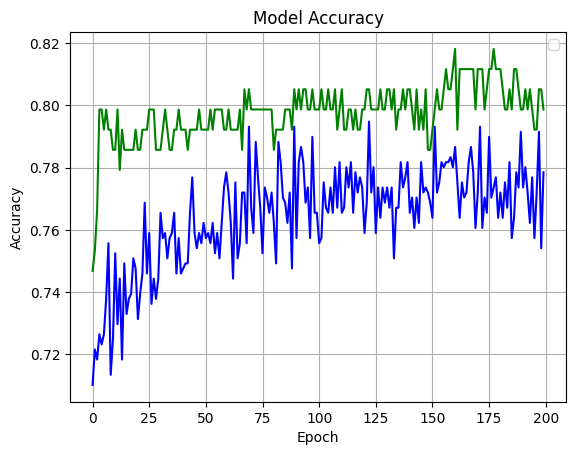

In [70]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()